#### Introduction

In this assignment we will analyse data taken from Ney York Police Department Motor Vehicle Collisions records. The dataset provides the total number of collisions for each day in New York from 2012 to present along with detailed weather conditions. The aim of the analysis is to find out what conditions affect the total number of collisions in order to subsequently create a linear regression model and a deep neural network model that can reliably predict the number of collisions.

#### Data Preprocessing

Firstly, we need to get the data. The data are sourced from the BigQuery public datasets and the dataset is called "NYPD Motor Vehicle Collisions". We only need to create a view that counts the number of collisions on a given day. To do this, we execute the command:

'CREATE VIEW `uhi-project397509.assignment_1.collisions_data_count` AS SELECT CAST(timestamp as DATE) as collision_date, COUNT(CAST(timestamp as DATE)) AS NUM_COLLISIONS FROM `bigquery-public-data.new_york_my_collisions.nypd_my_collisions` GROUP BY collision_date'.

Afterward, we add the day of the week column by running:

'CREATE VIEW `uhi-project397509.assignment_1.collisions_data_count_final` AS SELECT FORMAT_DATE("%u", collision_date) as day, collision_date, NUM_COLLISIONS FROM `uhi-project397509.assignment_1.collisions_data_count`'.


Secondly, we need to get the weather data from 2012 to the present. The data is also located in the BigQuery public datasets under the name "noaa_gsod". Here, we can find the data for each year from 2012 up to 2023, and we just need to create a view that that encompasses all these years. To do that we run the command:

'CREATE VIEW uhi-project397509.assignment_1.weather_2012_to_2023 AS SELECT DATE(CAST(year as INT64), CAST(mo as INT64), CAST(da as INT64)) as date, year, mo, da, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog FROM bigquery-public-data.noaa.gsod.gsod2012 WHERE stn='725060' union all [repeated for each subsequent year through 2023]`.

Thirdly, we collate the weather data with the number of collisions into a new table by running the command:

'CREATE TABLE `uhi-project397509.assignment_1.collated_collision_data` AS SELECT day, year, mo, da, collision_date, temp, dewp, slp, visib, wdsp, mxpsd, gust, max, min, prcp, sndp, fog, NUM_COLLISIONS FROM `uhi-project397509.assignment_1.weather_2012_to_2023` as weather, `uhi-project397509.assignment_1.collisions_data_count_final` as complaints WHERE complaints.collision_date = weather.date;'

Lastly, we export the data by clicking on 'Save results', save it as a CSV file, and then upload to GitHub. On GitHub, we create a new repository and simply upload the CSV file.

Now we can load the data from GitHub

In [ ]:
collisions <- read.csv("https://raw.githubusercontent.com/23009256uhi/23009256_DataAnalytics/main/bquxjob_3a539726_18a509bc0c1.csv")

Let's have a quick look at our data:

In [ ]:
head(collisions)

,day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,sndp,fog,NUM_COLLISIONS
,<int>,<int>,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,7,2018,9,23,2018-09-23,59.8,50.2,1023.4,10.0,3.0,5.1,999.9,78.1,53.1,0,999.9,0,475
2,6,2021,11,6,2021-11-06,43.1,29.7,1028.9,10.0,3.1,6.0,999.9,55.0,32.0,0,999.9,0,335
3,4,2018,12,20,2018-12-20,38.6,34.4,1020.2,9.6,5.0,7.0,999.9,48.0,21.0,0,999.9,0,806
4,2,2013,11,5,2013-11-05,43.5,30.4,1037.8,10.0,3.9,7.0,999.9,50.0,37.9,0,999.9,0,510
5,4,2021,10,7,2021-10-07,60.8,53.7,1025.4,9.4,2.8,7.0,999.9,72.0,51.1,0,999.9,0,368
6,3,2012,7,11,2012-07-11,77.1,62.0,1019.9,10.0,1.9,7.0,999.9,84.0,64.9,0,999.9,0,565


In [ ]:
summary(collisions)

      day             year            mo               da       
 Min.   :1.000   Min.   :2012   Min.   : 1.000   Min.   : 1.00  
 1st Qu.:2.000   1st Qu.:2015   1st Qu.: 6.000   1st Qu.: 8.00  
 Median :4.000   Median :2018   Median : 7.000   Median :16.00  
 Mean   :4.052   Mean   :2018   Mean   : 7.151   Mean   :16.02  
 3rd Qu.:6.000   3rd Qu.:2020   3rd Qu.: 9.000   3rd Qu.:24.00  
 Max.   :7.000   Max.   :2023   Max.   :12.000   Max.   :31.00  
 collision_date          temp            dewp            slp         
 Length:1000        Min.   :22.20   Min.   : 6.60   Min.   :  999.4  
 Class :character   1st Qu.:51.00   1st Qu.:44.35   1st Qu.: 1014.5  
 Mode  :character   Median :63.20   Median :57.35   Median : 1018.5  
                    Mean   :59.57   Mean   :53.15   Mean   : 1027.7  
                    3rd Qu.:69.20   3rd Qu.:64.70   3rd Qu.: 1022.8  
                    Max.   :85.30   Max.   :75.90   Max.   : 9999.9  
     visib             wdsp            mxpsd           

Here is some details about the weather:

**temp** - Average temperature of the day in degrees Fahrenheit to tenths. Missing = 9999.9

**dewp** - Average dew point of the day in degrees Fahrenheit to tenths. Missing = 9999.9

**slp** - Average sea level pressure of the day in millibars to tenths. Missing = 9999.9

**visib** - Average visibility of the day in miles to tenths. Missing = 999.9

**wdsp** - Average wind speed of the day in knots to tenths. Missing = 999.9

**mxpsd** - Maximum sustained wind speed reported for the day in knots to tenths. Missing = 999.9

**gust** - Maximum wind gust reported for the day in knots to tenths. Missing = 999.9

**max** - Maximum temperature reported during the day in degrees Fahrenheit to tenths. The time of the max temp report can vary by country and region, so this will sometimes not be the max for the calendar day. Missing = 9999.9

**min** - Minimum temperature reported during the day in degrees Fahrenheit to tenths. The time of min temp report can vary by country and region, so this will sometimes not be the min for the calendar day. Missing = 9999.9

**prcp** - Total precipitation, including rain and/or melted snow, reported during the day in inches and hundredths. A reading of .00 indicates no measurable precipitation. Missing = 99.99 Note: Many stations do not report '0' on days with no precipitation, hence '99.99' will often appear on these days.

**sndp** - Snow depth in inches to tenths. Missing = 999.9 Note: Most stations do not report '0' on days with no snow on the ground, hence '999.9' will often appear on these days

**fog** - This is an indicator for the occurrence of fog during the day, with 1 signifying 'yes' and 0 indicating 'no/not reported.

By looking at the data we can see that there are placeholders: 9999.9 for missing values in 'slp', 999.9 for missing values in 'gust', 'sndp' and 99.99 in 'prcp' instead of 0. In order to continue the data analysis
cleaning is required.

First of all, it looks like we don't have many valid values in the snow depth column. I've checked with SQL how many different values we have for that column (`SELECT COUNT(sndp), sndp FROM `uhi-project-397509 assignment_1collated_collision_data` GROUP BY sndp`), and the result is:
- 4073 times the value 999.9
- 1 time the value 3.9  

Therefore, the column doesn't offer useful information for the analysis. For this reason I've decided to remove the column entirely.  

In [ ]:
collisions$sndp <- NULL

Now let's replace '99.99' in the 'prcp' column with 0 as many stations do not report '0' on days with no precipitation--therefore, '99.99' will often appear on these days. If left as '99.99' statistical analysis would give misleading values and plotting the data could produce inaccurate graphs and charts. Also, we can replace the placeholders in the 'slp' and 'gust' columns with NA to avoid misinterpretations and misleading charts and plots.

In [ ]:
columns_to_clean <- c("slp", "gust", "prcp")

for(column in columns_to_clean) {
  if (column == "slp") {
    collisions[[column]][collisions[[column]] == 9999.9] <- NA
  } else if (column == "prcp") {
    collisions[[column]][collisions[[column]] == 99.99] <- 0
  } else {
    collisions[[column]][collisions[[column]] == 999.9] <- NA
  }
}

Let's have a look at the cleaned data.

In [ ]:
summary(collisions)

      day             year            mo               da       
 Min.   :1.000   Min.   :2012   Min.   : 1.000   Min.   : 1.00  
 1st Qu.:2.000   1st Qu.:2015   1st Qu.: 6.000   1st Qu.: 8.00  
 Median :4.000   Median :2018   Median : 7.000   Median :16.00  
 Mean   :4.052   Mean   :2018   Mean   : 7.151   Mean   :16.02  
 3rd Qu.:6.000   3rd Qu.:2020   3rd Qu.: 9.000   3rd Qu.:24.00  
 Max.   :7.000   Max.   :2023   Max.   :12.000   Max.   :31.00  
                                                                
 collision_date          temp            dewp            slp        
 Length:1000        Min.   :22.20   Min.   : 6.60   Min.   : 999.4  
 Class :character   1st Qu.:51.00   1st Qu.:44.35   1st Qu.:1014.5  
 Mode  :character   Median :63.20   Median :57.35   Median :1018.5  
                    Mean   :59.57   Mean   :53.15   Mean   :1018.7  
                    3rd Qu.:69.20   3rd Qu.:64.70   3rd Qu.:1022.8  
                    Max.   :85.30   Max.   :75.90   Max.   :1038.9

Let's first convert collision_date to Date type. This will make sure that all date values are valid.  

In [ ]:
collisions$collision_date <- as.Date(collisions$collision_date)

#### Exploratory Data Analysis

We can start analysing the data by looking at the number of collisions over the years, from 2012 to 2023.

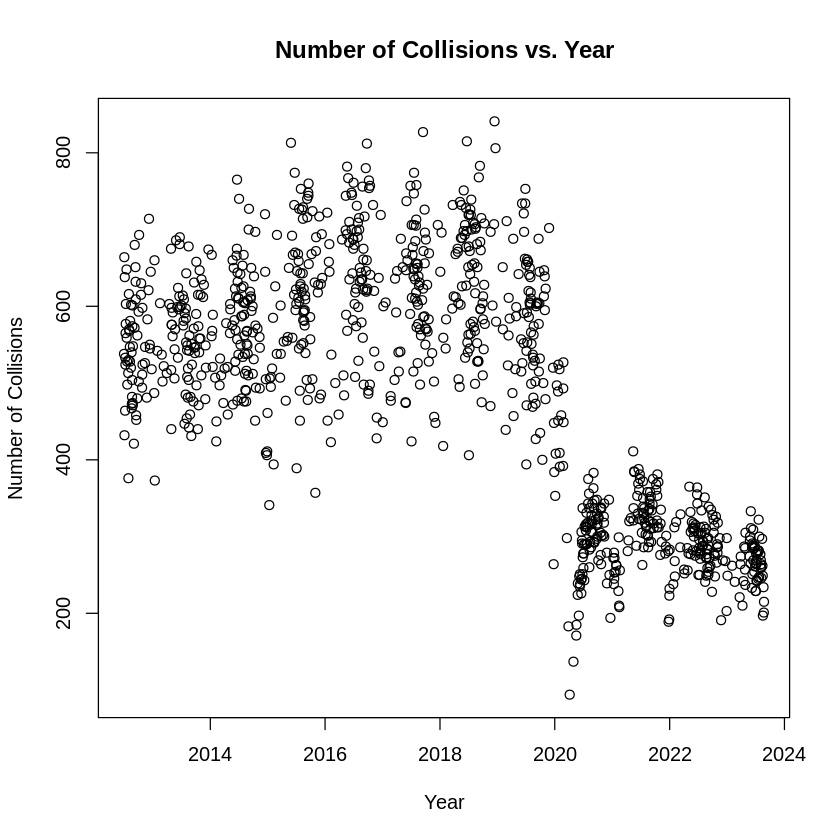

In [ ]:
plot(collisions$collision_date, collisions$NUM_COLLISIONS,
      main="Number of Collisions vs. Year",
      xlab = "Year", ylab = "Number of Collisions")

It looks like the number of collisions started to decrease in 2019 and had a significant drop in 2020. This might be due to the lockdowns during the COVID-19 pandemic.

Let's have a look at the histogram as well.

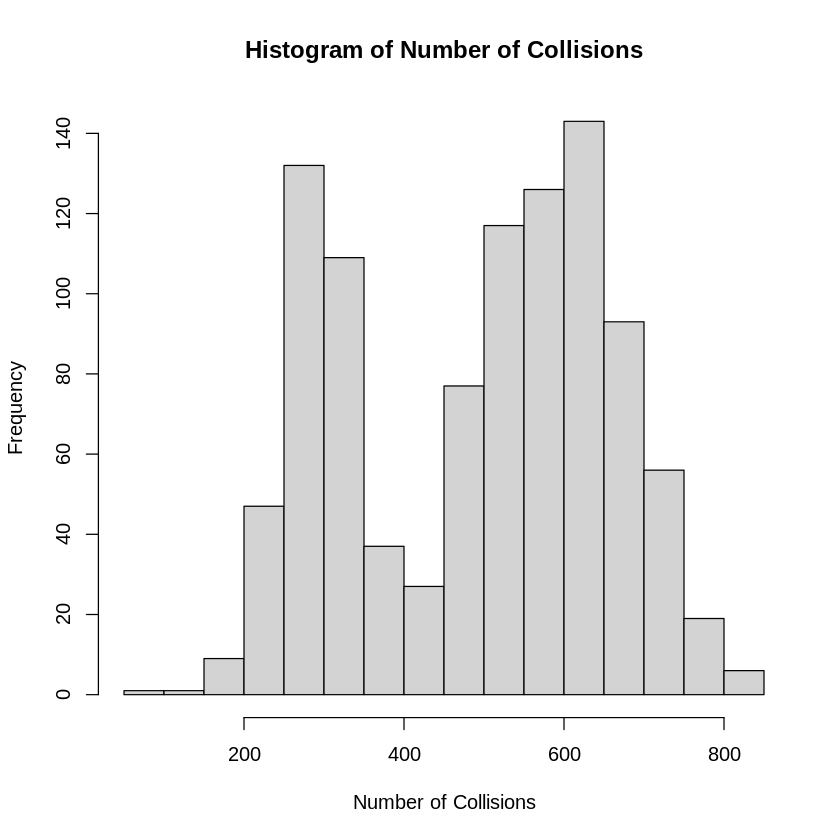

In [ ]:
hist(collisions$NUM_COLLISIONS, main="Histogram of Number of Collisions", xlab="Number of Collisions", ylab="Frequency")

It seems like the histogram confirmed the anomaly in the number of the collisions, as there are clearly 2 peaks.

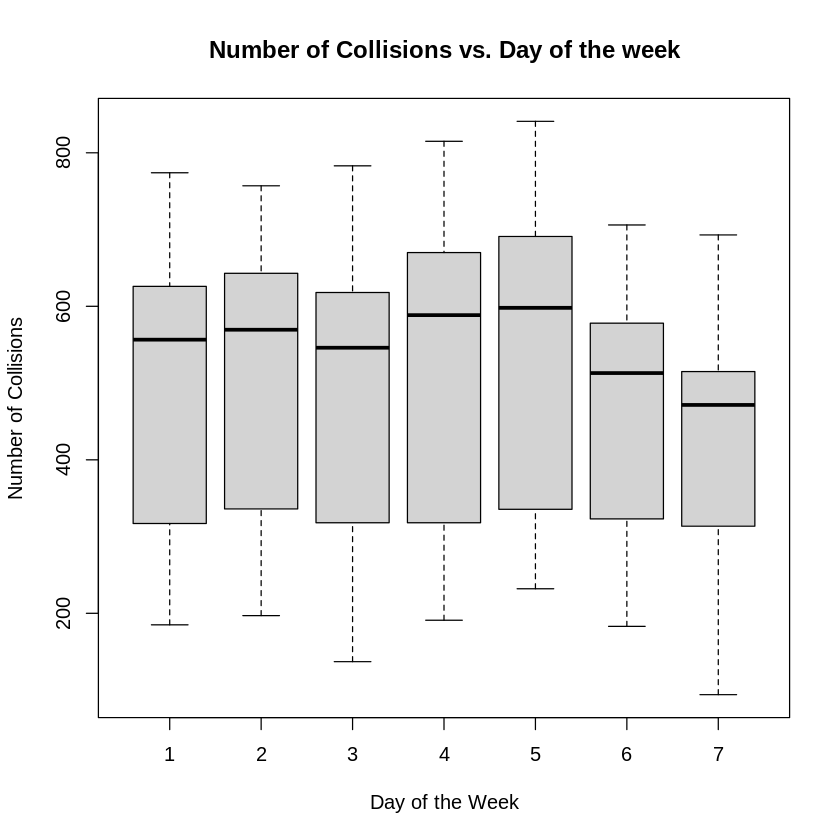

In [ ]:
boxplot(collisions$NUM_COLLISIONS ~ collisions$day,
        main="Number of Collisions vs. Day of the week",
        xlab = "Day of the Week", ylab = "Number of Collisions")

The day with the highest number of collisions is Friday (day 5). The day with the lowest number of collisions is Sunday (day 7). Weekends (day 6 and day 7) have fewer collisions compared to weekdays. We can further investigate the relationship between the day of the week and the number of collisions by the cor() function.

In [ ]:
cor(collisions$day, collisions$NUM_COLLISIONS)

[1] -0.1225326

There is a weak negative relationship in this case (-0.122532573721134), which confirms what we have seen in the previous chart. As the variable 'day' increases, the number of collisions decreases slightly.  


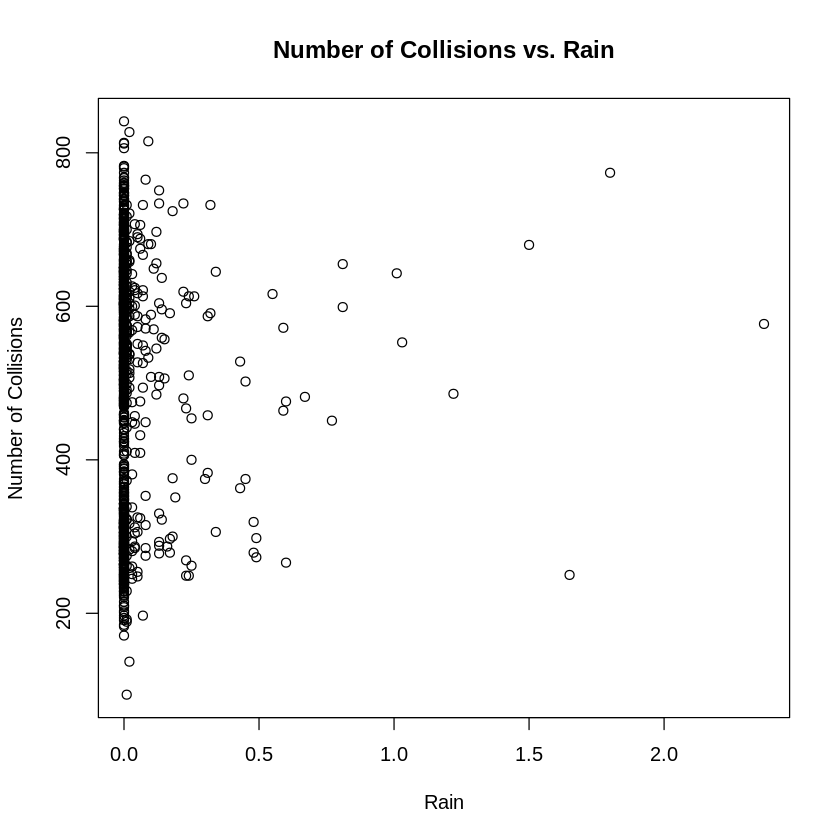

In [ ]:
plot(collisions$prcp, collisions$NUM_COLLISIONS,
      main="Number of Collisions vs. Rain",
      xlab = "Rain", ylab = "Number of Collisions")


In [ ]:
cor(collisions$prcp, collisions$NUM_COLLISIONS)

[1] 0.01765845

The correlation coefficient between the number of collisions and precipitation is 0.0176584454551517, indicating a very weak positive relationship.


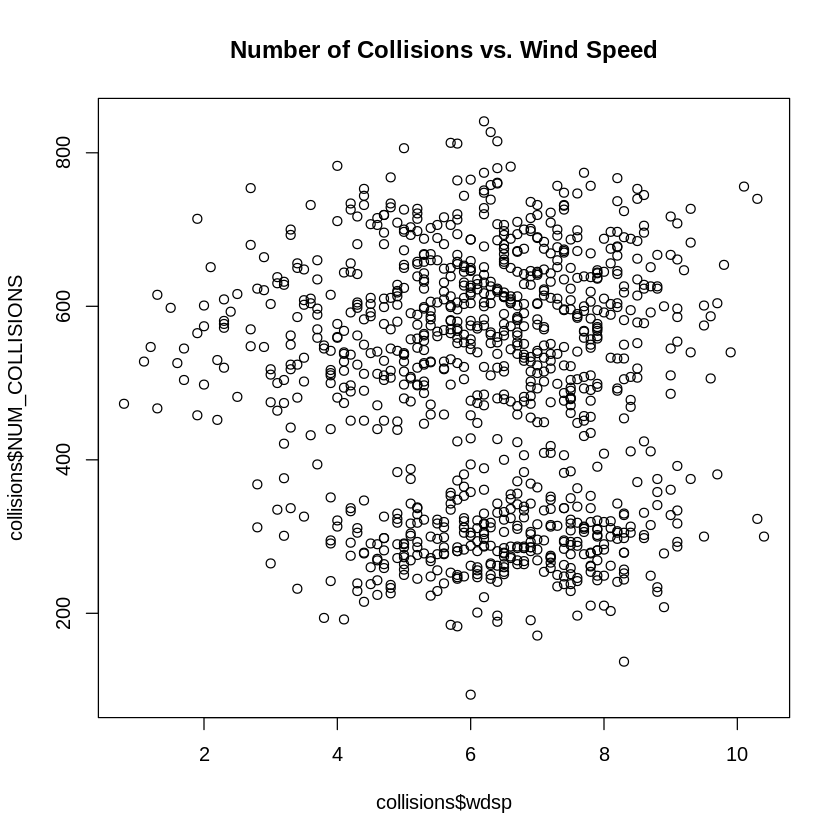

In [ ]:
plot(collisions$wdsp, collisions$NUM_COLLISIONS, main="Number of Collisions vs. Wind Speed")

In [ ]:
cor(collisions$wdsp, collisions$NUM_COLLISIONS)

[1] -0.06410316

The correlation coefficient between the number of collisions and wind speed is -0.0641031579261944, indicating a very weak negative relationship.

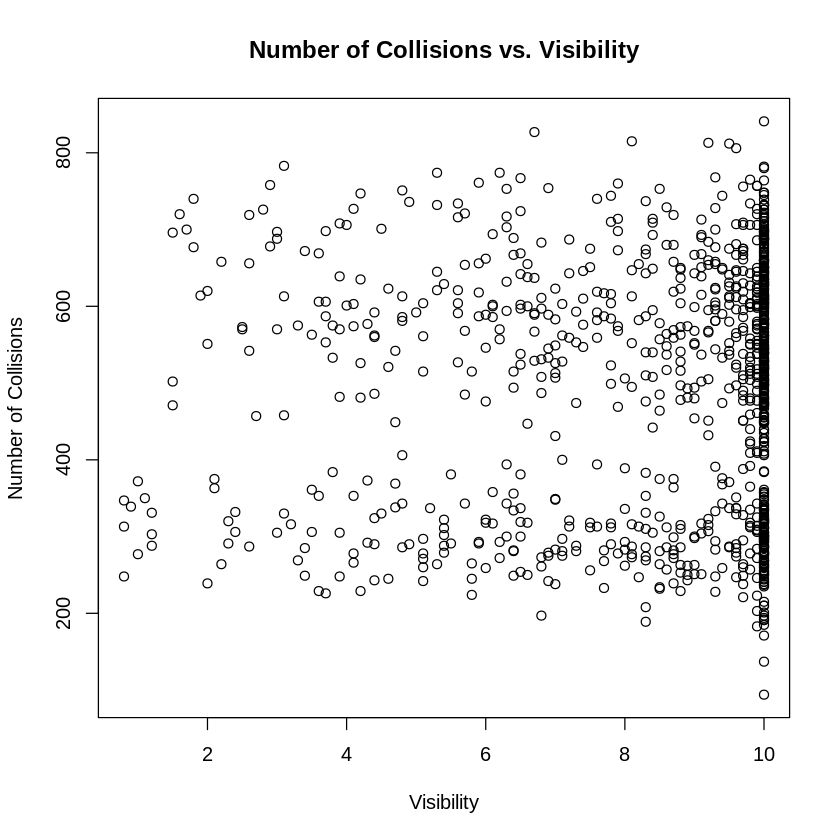

In [ ]:
plot(collisions$visib, collisions$NUM_COLLISIONS,
      main="Number of Collisions vs. Visibility",
      xlab = "Visibility", ylab = "Number of Collisions")

In [ ]:
cor(collisions$visib, collisions$NUM_COLLISIONS)

[1] 0.05332572

The correlation coefficient between the number of collisions and visibility is 0.0533257228794346, indicating a very weak positive relationship.

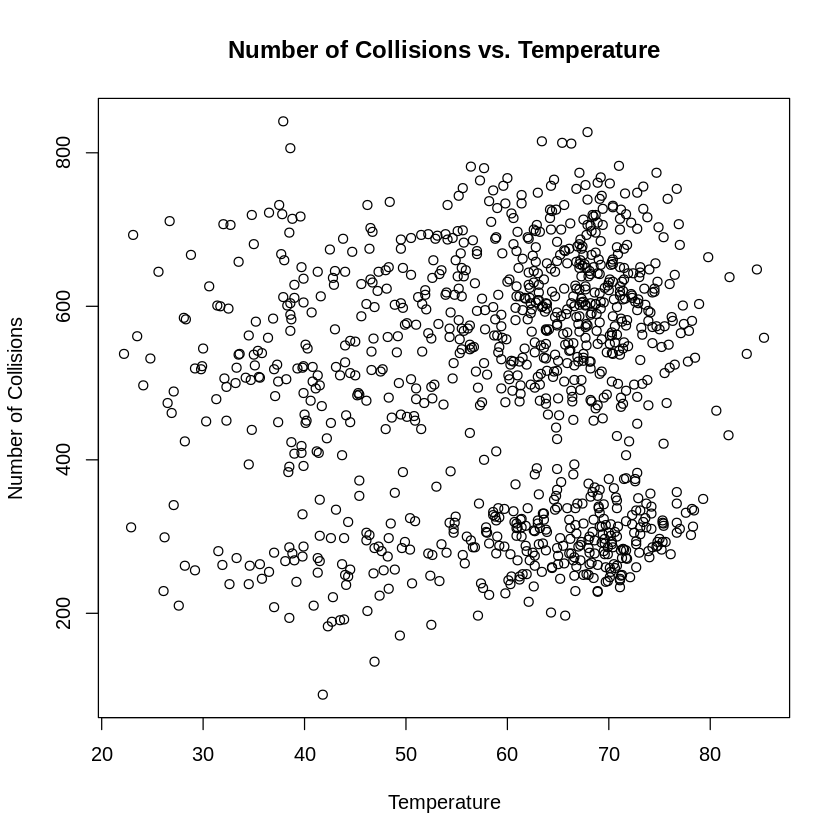

In [ ]:
plot(collisions$temp, collisions$NUM_COLLISIONS,
      main="Number of Collisions vs. Temperature",
      xlab = "Temperature", ylab = "Number of Collisions")

In [ ]:
cor(collisions$temp, collisions$NUM_COLLISIONS)

[1] 0.03909257

The correlation coefficient between the number of collisions and temperature is 0.0390925663894633, indicating a very weak positive relationship.

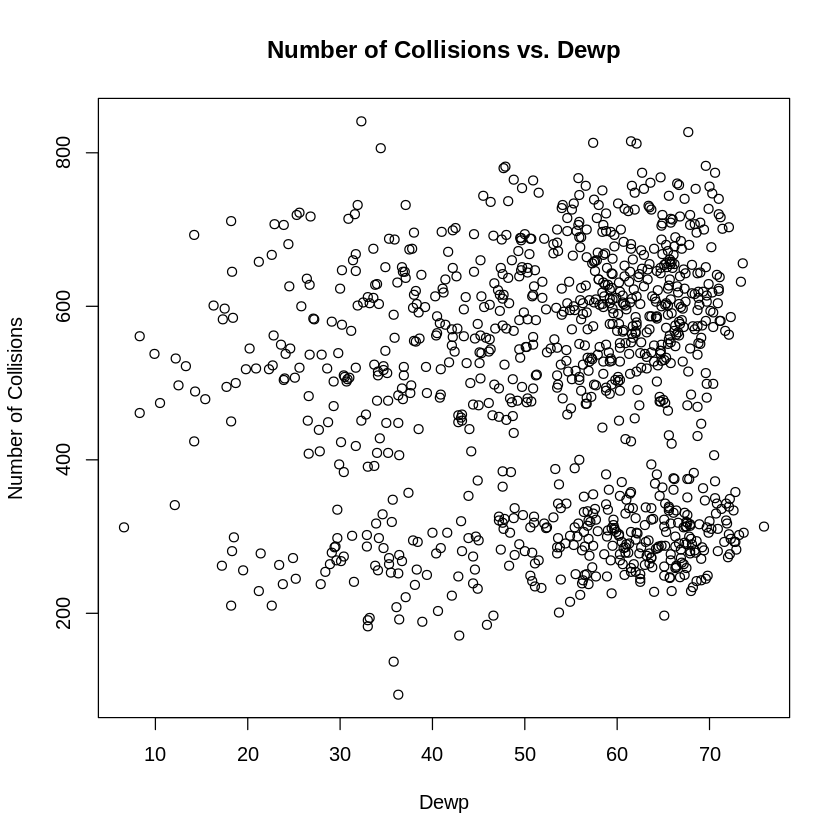

In [ ]:
plot(collisions$dewp, collisions$NUM_COLLISIONS,
      main="Number of Collisions vs. Dewp",
      xlab = "Dewp", ylab = "Number of Collisions")

In [ ]:
cor(collisions$dewp, collisions$NUM_COLLISIONS)

[1] 0.02707129

The correlation coefficient between the number of collisions and dew is 0.0270712878506546, indicating a very weak positive relationship.

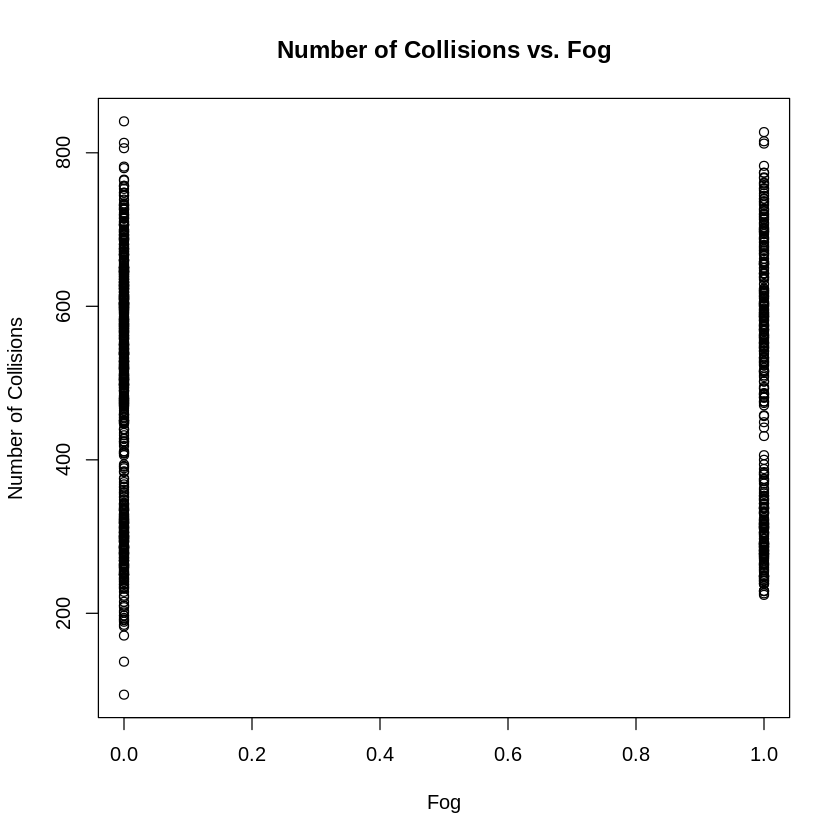

In [ ]:
plot(collisions$fog, collisions$NUM_COLLISIONS,
      main="Number of Collisions vs. Fog",
      xlab = "Fog", ylab = "Number of Collisions")

In [ ]:
cor(collisions$fog, collisions$NUM_COLLISIONS)

[1] -0.03062537

The correlation coefficient between the number of collisions and fog is -0.0306253720512169, indicating a very weak negative relationship.

#### Deeper Descriptive Statistics
To further understand the patterns and variability within our data, Let's also check if there are any outliers by using the Z-score. A Z-score above 2 or below -2 indicates an outlier.


In [ ]:
collisions$z_score <- scale(collisions$NUM_COLLISIONS)
outliers <- subset(collisions, z_score > 2 | z_score < -2)

View(outliers)

,day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,fog,NUM_COLLISIONS,z_score
,<int>,<int>,<int>,<int>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,"<dbl[,1]>"
95,7,2020,4,5,2020-04-05,41.8,36.3,1017.5,10.0,6.0,8.9,NA,50.0,35.1,0.01,0,94,-2.477482
418,5,2018,12,14,2018-12-14,37.9,32.3,1033.0,10.0,6.2,11.1,NA,46.0,23.0,0.00,0,841,2.159580
600,5,2017,9,15,2017-09-15,67.9,67.7,1016.3,6.7,6.3,11.1,NA,73.9,64.0,0.02,1,827,2.072674
748,3,2020,4,29,2020-04-29,46.9,35.8,1024.6,10.0,8.3,12.0,NA,55.0,37.0,0.02,0,137,-2.210557


It looks like we have 4 outliers. However, the date of entries 95 and 748 is April 2020 and the low number of collisions on those days is most likely due to COVID-19 restrictions. Entry 418 has a high number of collisions but the weather conditions don't seem extreme. The high number of collisions might be due to other factors. Entry 600 also has a high number of collisions, but the visibility is a bit lower and there was fog. It's probably worth investigating the effects of visibility and fog and their interaction on the number of collisions.  

#### Adjusted Analysis: Excluding COVID Years

To better understand the trends in collision data, an adjusted analysis will be conducted by excluding the anomalous years affected by COVID-19. First, we'll have to filter out data for the years 2020 onwards.

In [ ]:
collisions_filtered <- collisions[format(collisions$collision_date, "%Y") < "2020", ]

Let's have a look at the adjusted data.

In [ ]:
head(collisions_filtered)

,day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,fog,NUM_COLLISIONS,z_score
,<int>,<int>,<int>,<int>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,"<dbl[,1]>"
1,7,2018,9,23,2018-09-23,59.8,50.2,1023.4,10.0,3.0,5.1,NA,78.1,53.1,0,0,475,-0.1123944
3,4,2018,12,20,2018-12-20,38.6,34.4,1020.2,9.6,5.0,7.0,NA,48.0,21.0,0,0,806,1.9423146
4,2,2013,11,5,2013-11-05,43.5,30.4,1037.8,10.0,3.9,7.0,NA,50.0,37.9,0,0,510,0.1048709
6,3,2012,7,11,2012-07-11,77.1,62.0,1019.9,10.0,1.9,7.0,NA,84.0,64.9,0,0,565,0.4462878
7,4,2012,8,9,2012-08-09,78.2,69.6,1013.6,9.3,2.3,7.0,15,88.0,61.0,0,0,581,0.5456090
8,4,2012,7,12,2012-07-12,77.4,60.2,1021.7,10.0,2.3,7.0,NA,88.0,57.0,0,0,577,0.5207787


In [ ]:
summary(collisions_filtered)

      day             year            mo               da       
 Min.   :1.000   Min.   :2012   Min.   : 1.000   Min.   : 1.00  
 1st Qu.:2.000   1st Qu.:2014   1st Qu.: 6.000   1st Qu.: 9.00  
 Median :4.000   Median :2016   Median : 8.000   Median :16.50  
 Mean   :4.011   Mean   :2016   Mean   : 7.278   Mean   :16.07  
 3rd Qu.:6.000   3rd Qu.:2018   3rd Qu.: 9.000   3rd Qu.:24.00  
 Max.   :7.000   Max.   :2019   Max.   :12.000   Max.   :31.00  
                                                                
 collision_date            temp            dewp            slp        
 Min.   :2012-07-01   Min.   :22.20   Min.   : 8.30   Min.   : 999.4  
 1st Qu.:2014-05-07   1st Qu.:51.00   1st Qu.:43.62   1st Qu.:1015.0  
 Median :2016-01-16   Median :63.00   Median :56.70   Median :1019.1  
 Mean   :2016-02-22   Mean   :59.23   Mean   :52.46   Mean   :1019.0  
 3rd Qu.:2018-03-22   3rd Qu.:68.88   3rd Qu.:64.00   3rd Qu.:1023.0  
 Max.   :2019-12-29   Max.   :85.30   Max.   :73.60   

It's worth to reanalyse the data by looking at the number of collisions over the years and their relationship with the weather conditions.

First, we have to convert collision_date to Date type. This will make sure that all date values are valid.  

In [ ]:
collisions_filtered$collision_date <- as.Date(collisions_filtered$collision_date)

Now we can proceed to analyse the data by looking at the number of collisions over the years, from 2012 to 2019.

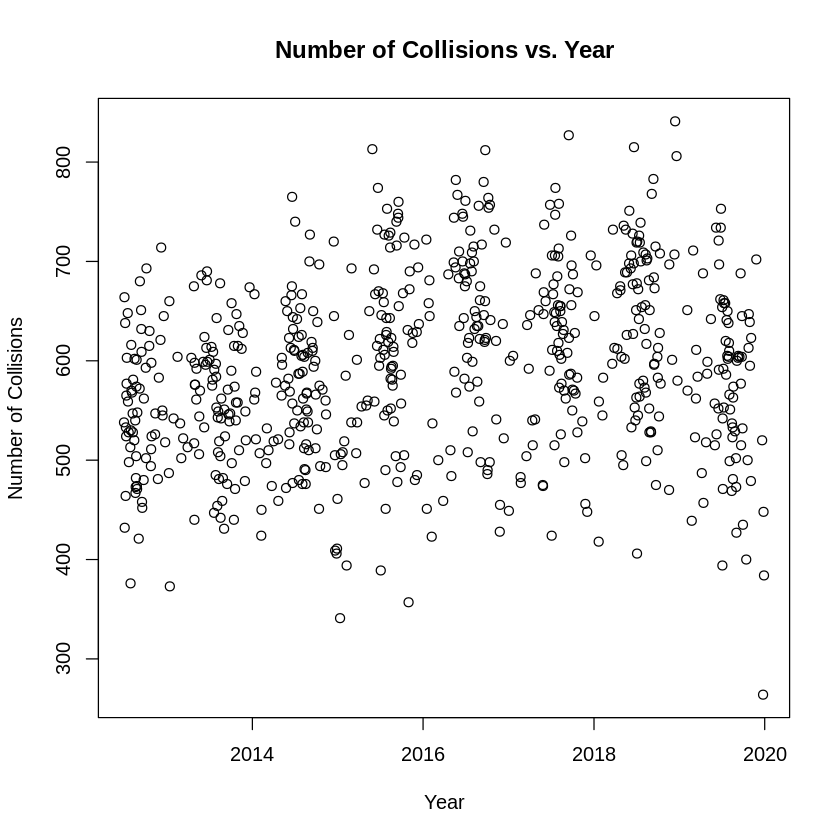

In [ ]:
plot(collisions_filtered$collision_date, collisions_filtered$NUM_COLLISIONS,
      main="Number of Collisions vs. Year",
      xlab = "Year", ylab = "Number of Collisions")

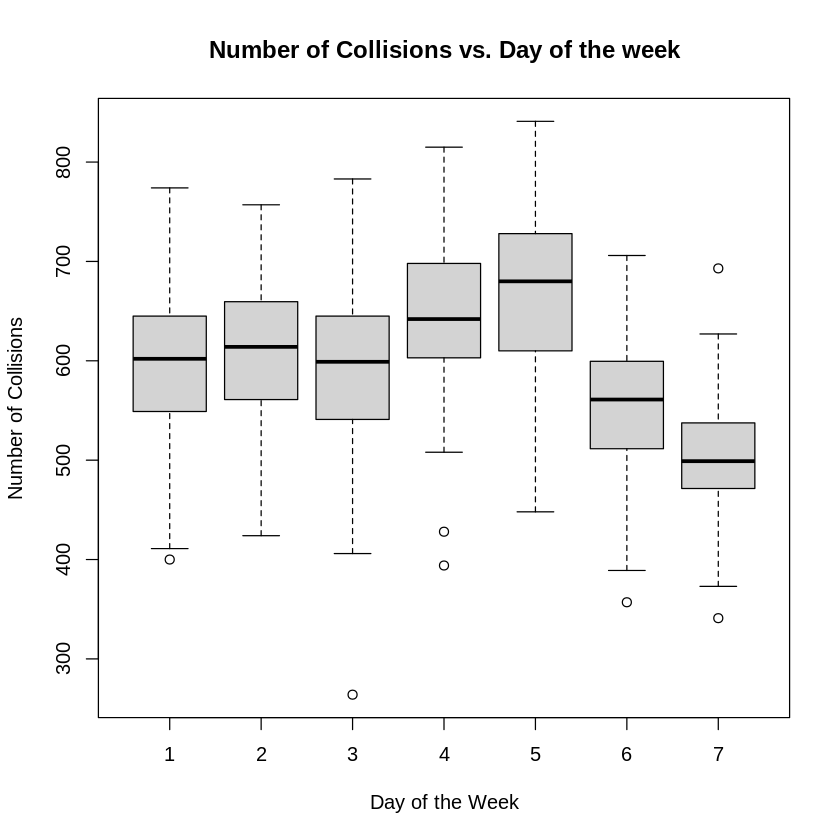

In [ ]:
boxplot(collisions_filtered$NUM_COLLISIONS ~ collisions_filtered$day,
        main="Number of Collisions vs. Day of the week",
        xlab = "Day of the Week", ylab = "Number of Collisions")

Again, the day with the highest number of collisions is Friday (day 5) and the day with the lowest number of collisions is Sunday (day 7). Weekends (day 6 and day 7) have fewer collisions compared to weekdays. We can now investigate again the relationship between the day of the week and the number of collisions by the cor() function.

In [ ]:
cor(collisions_filtered$day, collisions_filtered$NUM_COLLISIONS)

[1] -0.2643806

The correlation coefficient -0.264380645485475 indicates a weak to moderate negative correlation between the day and the number of collisions, which confirms what we have seen in the previous chart.

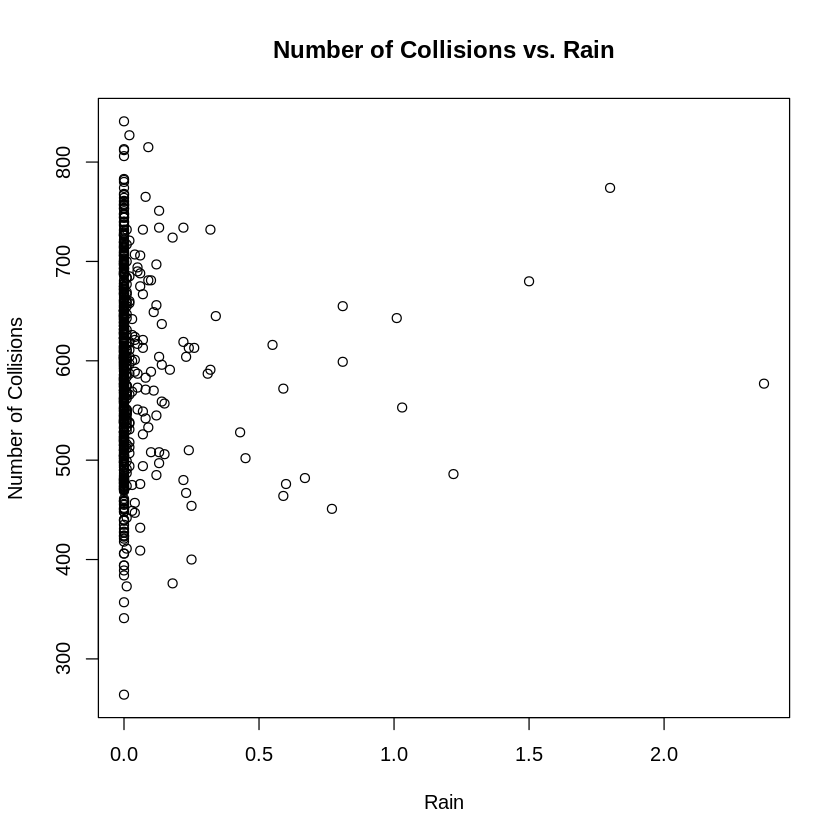

In [ ]:
plot(collisions_filtered$prcp, collisions_filtered$NUM_COLLISIONS,
      main="Number of Collisions vs. Rain",
      xlab = "Rain", ylab = "Number of Collisions")

In [ ]:
cor(collisions_filtered$prcp, collisions_filtered$NUM_COLLISIONS)

[1] -0.008819375

The correlation coefficient is -0.00881937518657959. This value is very close to 0, which indicates a very weak or no linear between precipitation and the number of collisions. When a correlation coefficient is close to zero, it suggests that changes in one variable do not predict changes in the other variable. Therefore, precipitation is not a good predictor of the number of collisions.

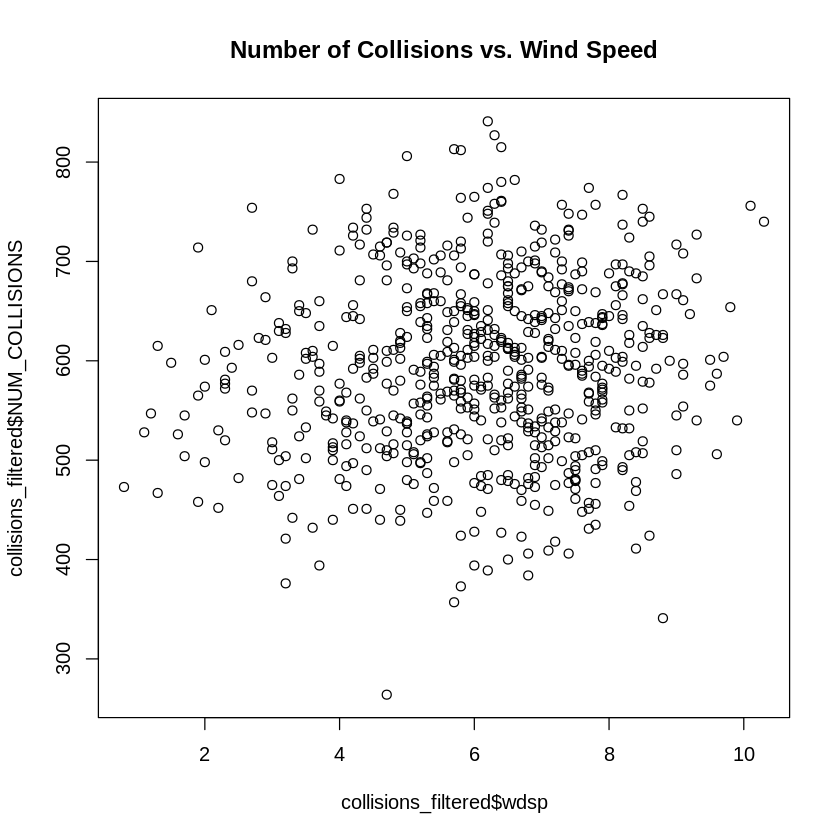

In [ ]:
plot(collisions_filtered$wdsp, collisions_filtered$NUM_COLLISIONS, main="Number of Collisions vs. Wind Speed")

In [ ]:
cor(collisions_filtered$wdsp, collisions_filtered$NUM_COLLISIONS)

[1] 0.1008301

The correlation coefficient is 0.100830071421215, which indicates a weak positive relationship between wind speed and the number of collisions.

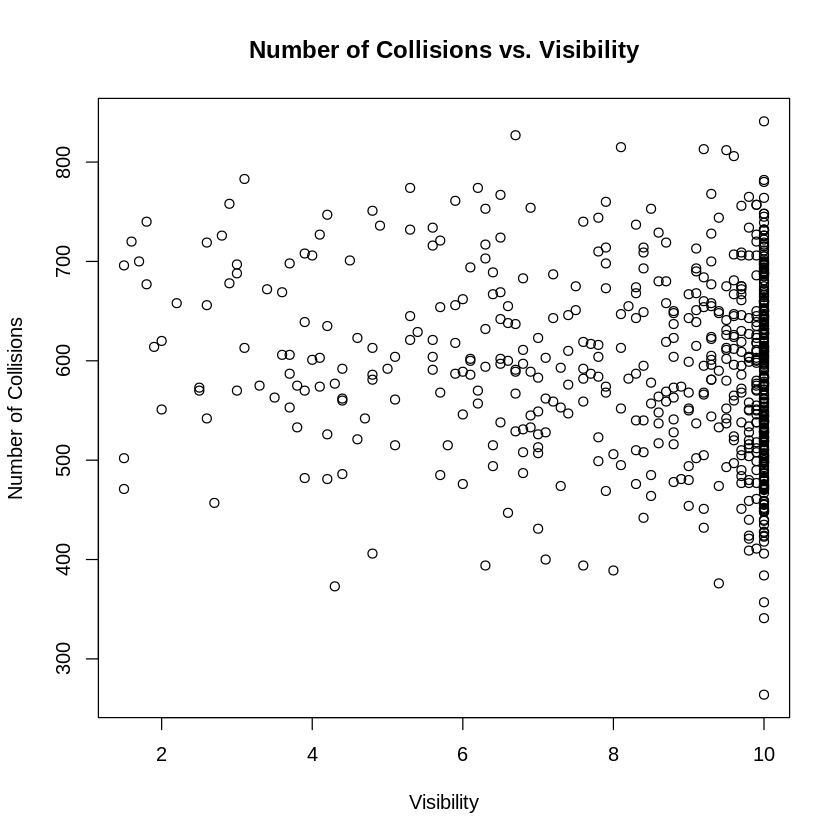

In [ ]:
plot(collisions_filtered$visib, collisions_filtered$NUM_COLLISIONS,
      main="Number of Collisions vs. Visibility",
      xlab = "Visibility", ylab = "Number of Collisions")

In [ ]:
cor(collisions_filtered$visib, collisions_filtered$NUM_COLLISIONS)

[1] -0.1230988

The correlation coefficient between visibility and number of collisions in the is approximately -0.1231. This value indicates a weak negative relationship between visibility and the number of collisions.

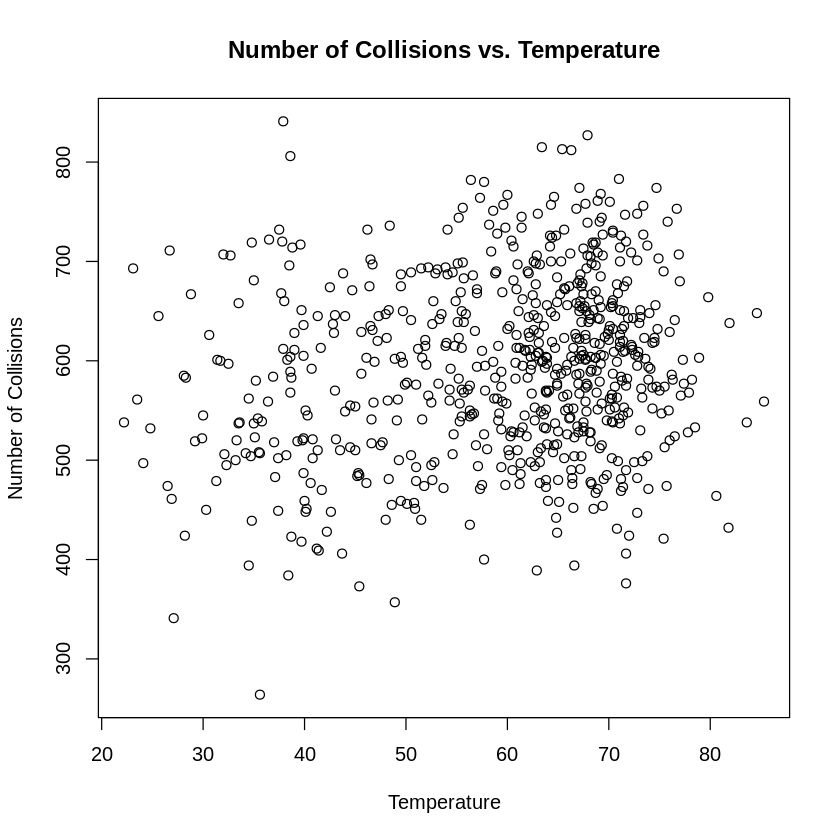

In [ ]:
plot(collisions_filtered$temp, collisions_filtered$NUM_COLLISIONS,
      main="Number of Collisions vs. Temperature",
      xlab = "Temperature", ylab = "Number of Collisions")

In [ ]:
cor(collisions_filtered$temp, collisions_filtered$NUM_COLLISIONS)

[1] 0.1761696


The correlation coefficient between temperature and number of collisions is 0.176169578304164. This indicates a weak positive relationship between temperature and the number of collisions.

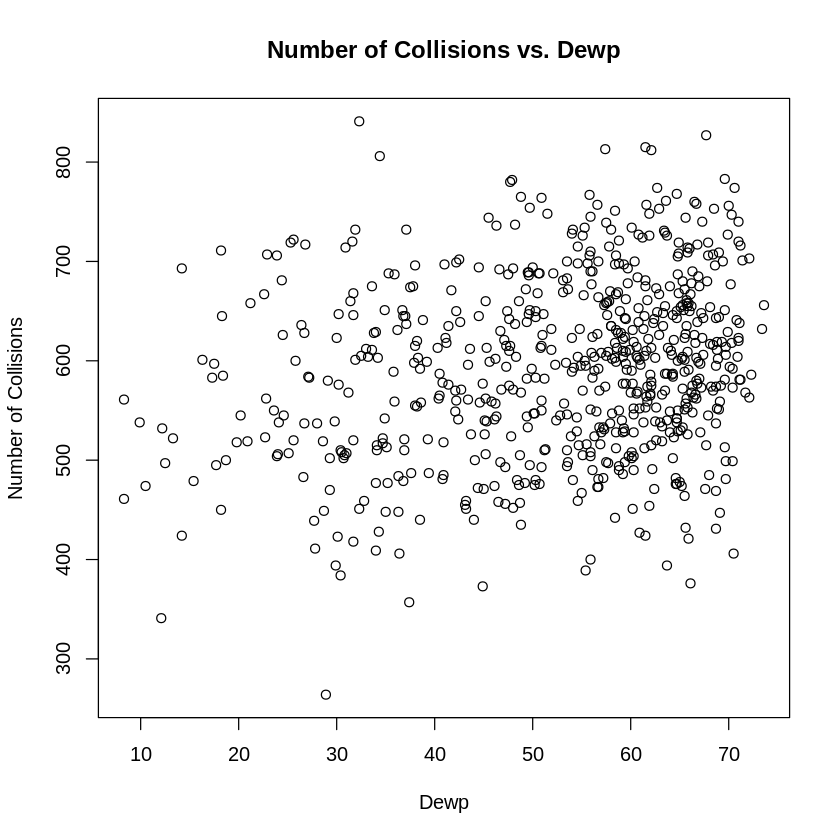

In [ ]:
plot(collisions_filtered$dewp, collisions_filtered$NUM_COLLISIONS,
      main="Number of Collisions vs. Dewp",
      xlab = "Dewp", ylab = "Number of Collisions")

In [ ]:
cor(collisions_filtered$dewp, collisions_filtered$NUM_COLLISIONS)

[1] 0.215391

The correlation coefficient between dew point and number of collisions is approximately 0.2154, which indicates a weak to moderate positive relationship.

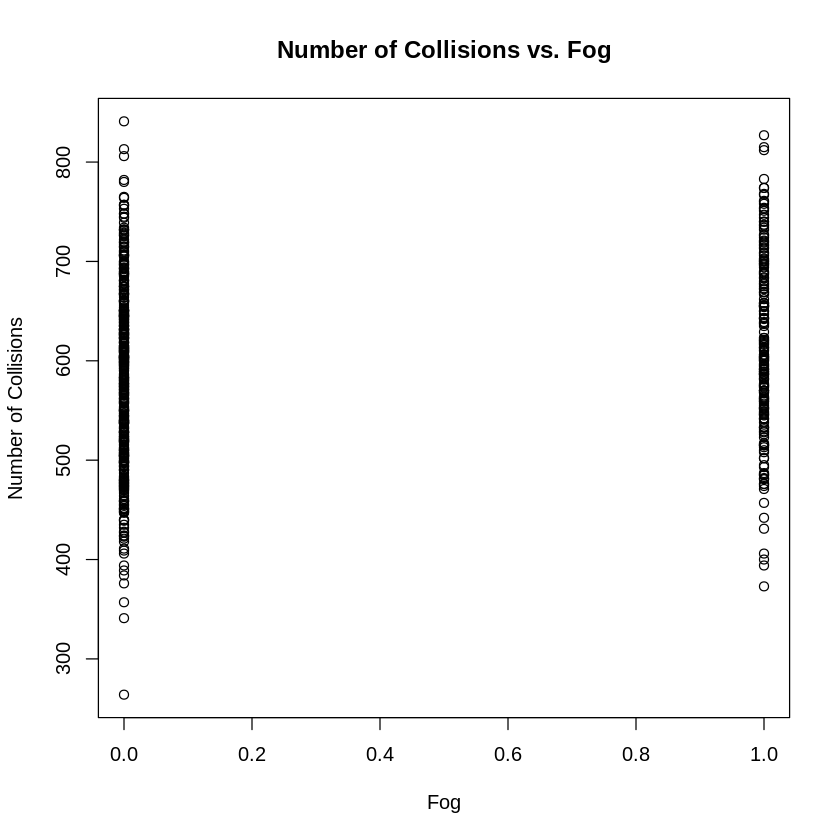

In [ ]:
plot(collisions_filtered$fog, collisions_filtered$NUM_COLLISIONS,
      main="Number of Collisions vs. Fog",
      xlab = "Fog", ylab = "Number of Collisions")

In [ ]:
cor(collisions_filtered$fog, collisions_filtered$NUM_COLLISIONS)

[1] 0.1453369

The correlation coefficient between fog and number of collisions is 0.145336911959712, which suggests a weak positive relationship.

#### Rearranging Days of the Week

If we look again at the number of collisions versus the day of the week, we see that there is a linear correlation when we arrange the days with the weekend preceding Monday. Let's see what happens when we move Sunday before Monday.

In [ ]:
# Increment each day by 1
collisions_filtered$day <- collisions_filtered$day + 1

# Convert any day with a value of 8 to 1
collisions_filtered$day[collisions_filtered$day == 8] <- 1

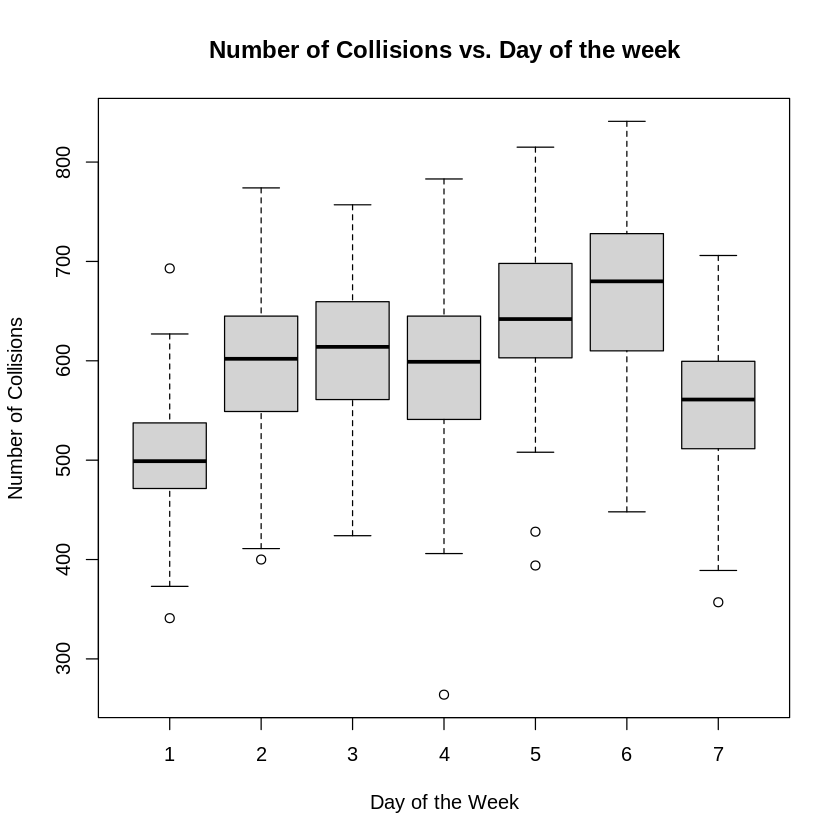

In [ ]:
boxplot(collisions_filtered$NUM_COLLISIONS ~ collisions_filtered$day,
        main="Number of Collisions vs. Day of the week",
        xlab = "Day of the Week", ylab = "Number of Collisions")

In [ ]:
cor(collisions_filtered$day, collisions_filtered$NUM_COLLISIONS)

[1] 0.2515615

It looks like there is a weak correlation when we move Sunday before Monday.

Let's see now if we move Saturday and Sunday before Monday.

In [ ]:
# Increment each day by 1
collisions_filtered$day <- collisions_filtered$day + 1

# Convert any day with a value of 8 to 1
collisions_filtered$day[collisions_filtered$day == 8] <- 1

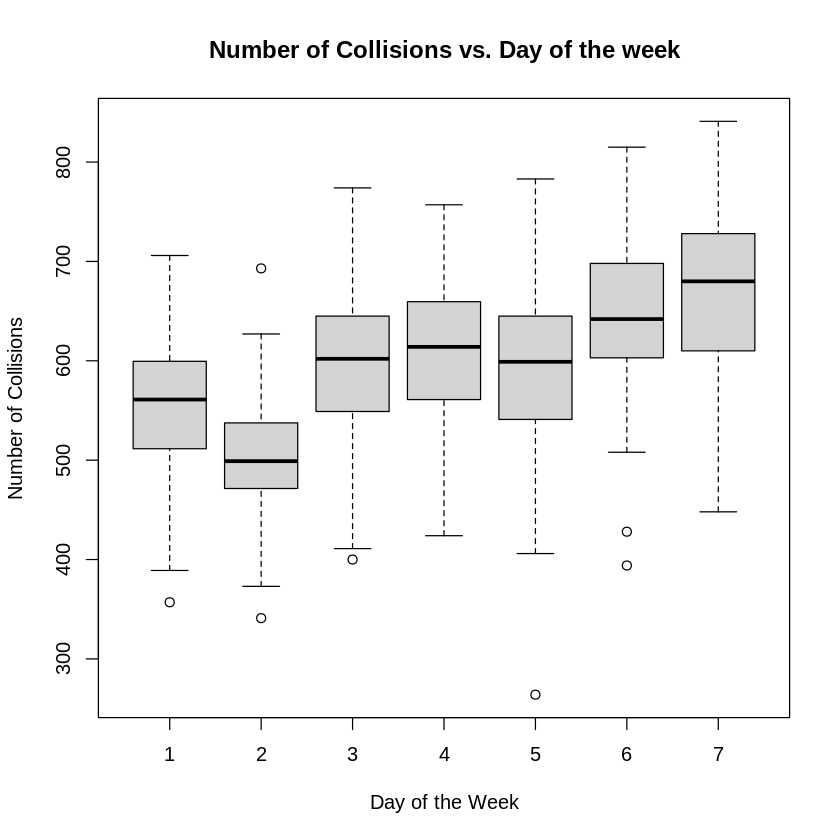

In [ ]:
boxplot(collisions_filtered$NUM_COLLISIONS ~ collisions_filtered$day,
        main="Number of Collisions vs. Day of the week",
        xlab = "Day of the Week", ylab = "Number of Collisions")

In [ ]:
cor(collisions_filtered$day, collisions_filtered$NUM_COLLISIONS)

[1] 0.4848325

In this case the correlation is moderate

#### Yearly Correlation Analysis

Now we can create a function to analyse the correlation on a yearly basis to gain deeper insights into the patterns.

Year: 2012 Correlation: 0.5724376 
Year: 2013 Correlation: 0.5926041 
Year: 2014 Correlation: 0.5117094 
Year: 2015 Correlation: 0.5118076 
Year: 2016 Correlation: 0.5277982 
Year: 2017 Correlation: 0.4453828 
Year: 2018 Correlation: 0.6033123 
Year: 2019 Correlation: 0.4400175 


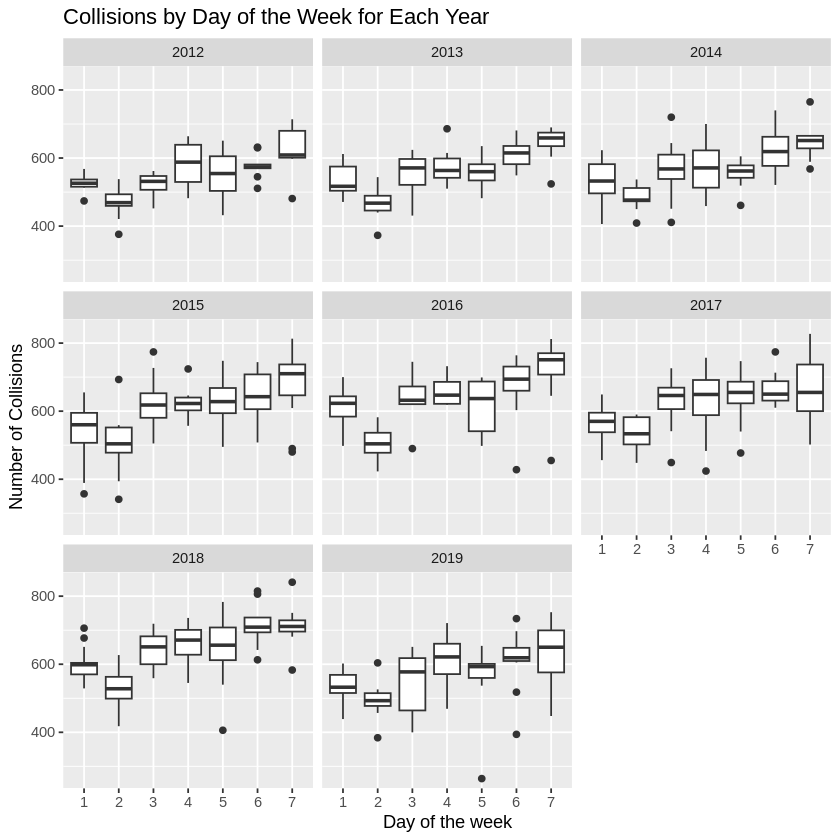

In [ ]:
library(ggplot2)

# Subset data by year
years <- sort(unique(collisions_filtered$year))

for (y in years) {
    year_data <- subset(collisions_filtered, year == y)
    corr <- cor(year_data$day, year_data$NUM_COLLISIONS)
    cat("Year:", y, "Correlation:", corr, "\n")
}

# Boxplot to visualize collisions by day for each year
ggplot(collisions_filtered, aes(x=factor(day), y=NUM_COLLISIONS)) +
    geom_boxplot() +
    facet_wrap(~year) +
    labs(x='Day of the week', y='Number of Collisions', title='Collisions by Day of the Week for Each Year')

In [ ]:
corr_and_plot <- function(variable, x_name) {
  years <- sort(unique(collisions_filtered$year))

  for (y in years) {
    year_data <- subset(collisions_filtered, year == y)
    corr <- cor(year_data[[variable]], year_data$NUM_COLLISIONS)
    cat("Year:", y, "Correlation:", corr, "\n")
  }

  ggplot(collisions_filtered, aes_string(x=variable, y='NUM_COLLISIONS')) +
    geom_point(alpha=0.5) +
    geom_smooth(method='loess', span=1.5, se=FALSE, color="red") +
    # geom_smooth(method='loess', se=FALSE, color="red") +
    facet_wrap(~year) +
    labs(x=x_name, y='Number of Collisions') +
    theme_minimal()
}

Year: 2012 Correlation: -0.1074161 
Year: 2013 Correlation: -0.002327256 
Year: 2014 Correlation: 0.362282 
Year: 2015 Correlation: 0.3696571 
Year: 2016 Correlation: 0.3198411 
Year: 2017 Correlation: 0.4184664 
Year: 2018 Correlation: 0.03004877 
Year: 2019 Correlation: 0.1613479 


Warning message:
“`aes_string()` was deprecated in ggplot2 3.0.0.
ℹ Please use tidy evaluation idioms with `aes()`.
ℹ See also `vignette("ggplot2-in-packages")` for more information.”
`geom_smooth()` using formula = 'y ~ x'


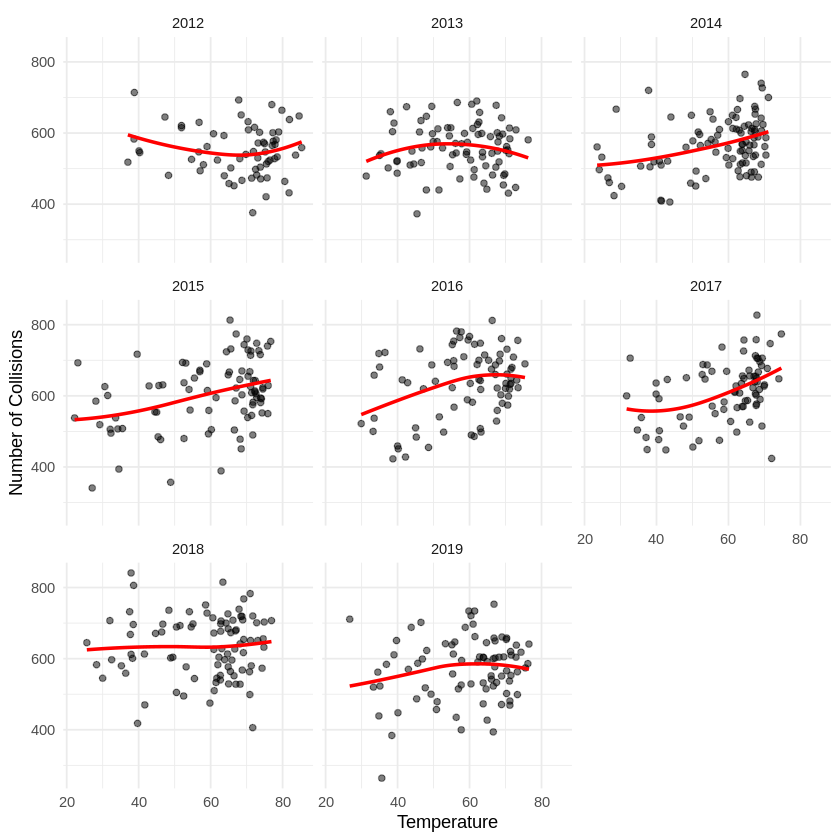

In [ ]:
corr_and_plot("temp", "Temperature")

Year: 2012 Correlation: -0.1187568 
Year: 2013 Correlation: -0.1265995 
Year: 2014 Correlation: -0.07435106 
Year: 2015 Correlation: 0.1829506 
Year: 2016 Correlation: -0.180812 
Year: 2017 Correlation: 0.05548572 
Year: 2018 Correlation: -0.08264051 
Year: 2019 Correlation: 0.08753704 


`geom_smooth()` using formula = 'y ~ x'


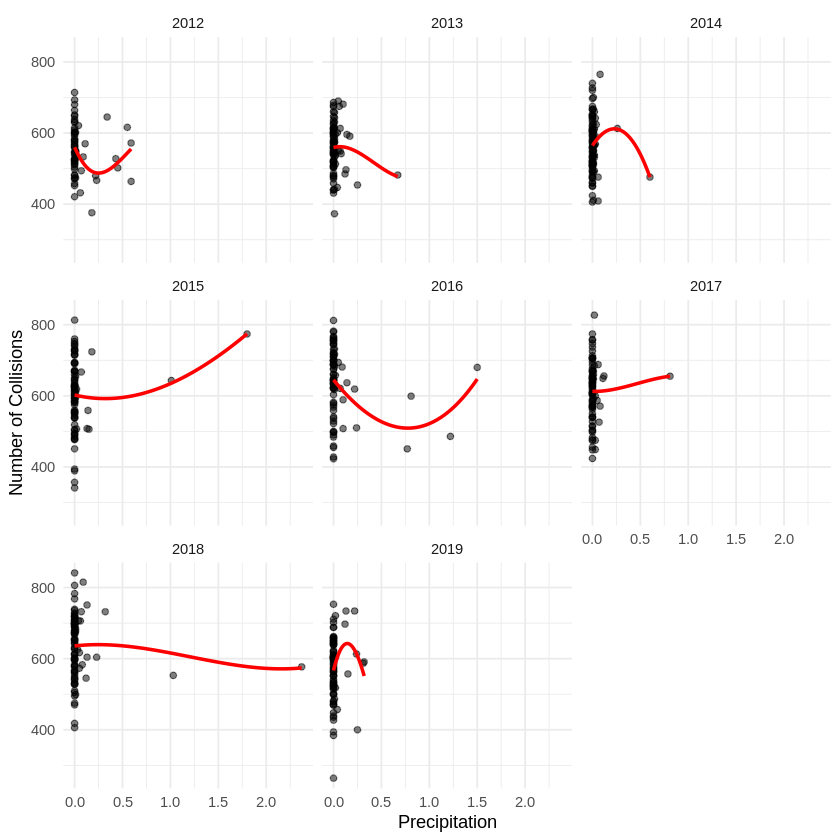

In [ ]:
corr_and_plot("prcp", "Precipitation")

Year: 2012 Correlation: -0.1142228 
Year: 2013 Correlation: -0.006848646 
Year: 2014 Correlation: 0.3482864 
Year: 2015 Correlation: 0.3773453 
Year: 2016 Correlation: 0.2751772 
Year: 2017 Correlation: 0.4371364 
Year: 2018 Correlation: 0.07625347 
Year: 2019 Correlation: 0.1538561 


`geom_smooth()` using formula = 'y ~ x'


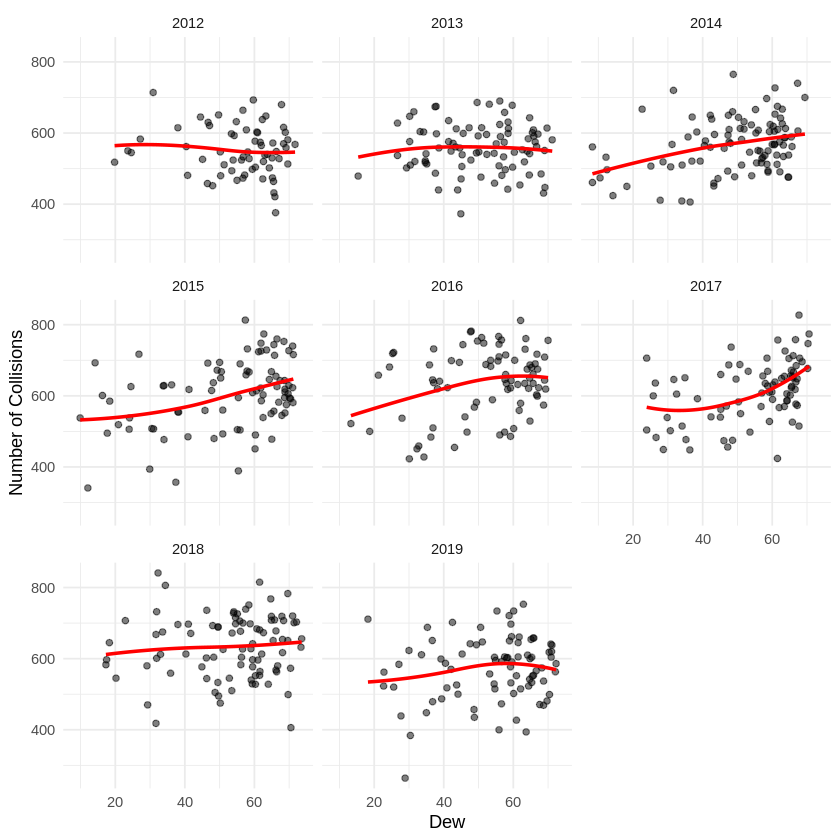

In [ ]:
corr_and_plot("dewp", "Dew")

Year: 2012 Correlation: -0.03200314 
Year: 2013 Correlation: 0.1735577 
Year: 2014 Correlation: -0.05527116 
Year: 2015 Correlation: -0.1056618 
Year: 2016 Correlation: 0.1176686 
Year: 2017 Correlation: -0.02775267 
Year: 2018 Correlation: -0.05089692 
Year: 2019 Correlation: -0.03764444 


`geom_smooth()` using formula = 'y ~ x'


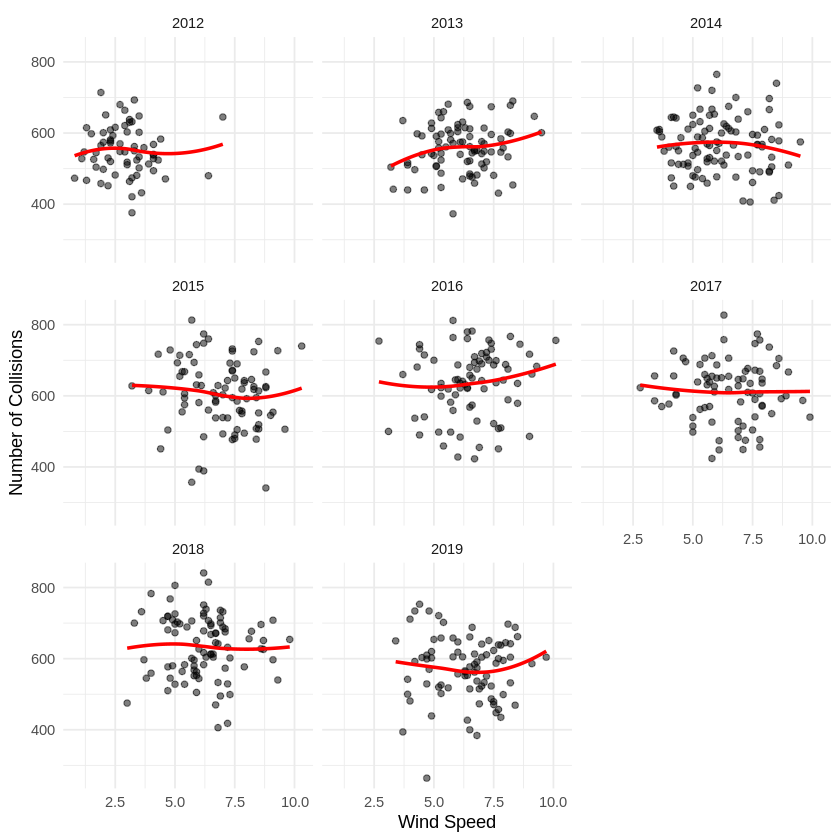

In [ ]:
corr_and_plot("wdsp", "Wind Speed")

Year: 2012 Correlation: -0.1050434 
Year: 2013 Correlation: 0.07987752 
Year: 2014 Correlation: -0.1854349 
Year: 2015 Correlation: -0.1785232 
Year: 2016 Correlation: 0.04293974 
Year: 2017 Correlation: -0.3279891 
Year: 2018 Correlation: -0.2141372 
Year: 2019 Correlation: -0.0505181 


`geom_smooth()` using formula = 'y ~ x'


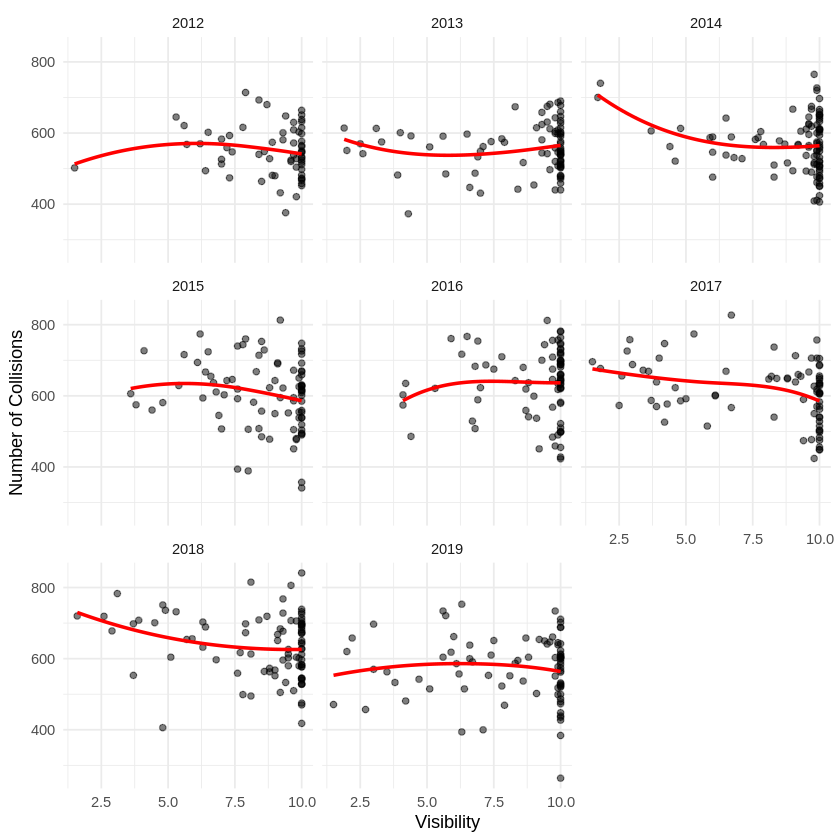

In [ ]:
corr_and_plot("visib", "Visibility")

Year: 2012 Correlation: -0.006263575 
Year: 2013 Correlation: -0.1436347 
Year: 2014 Correlation: 0.05367257 
Year: 2015 Correlation: 0.2959823 
Year: 2016 Correlation: 0.04885796 
Year: 2017 Correlation: 0.3938217 
Year: 2018 Correlation: 0.1638622 
Year: 2019 Correlation: 0.1174665 


`geom_smooth()` using formula = 'y ~ x'
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.005”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 1.2309”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  1.9187e-16”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“There are other near singularities as well. 1.515”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“pseudoinverse used at -0.005”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“neighborhood radius 1.2309”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric = parametric, :
“reciprocal condition number  1.1821e-16”
Warning message in simpleLoess(y, x, w, span, degree = degree, parametric 

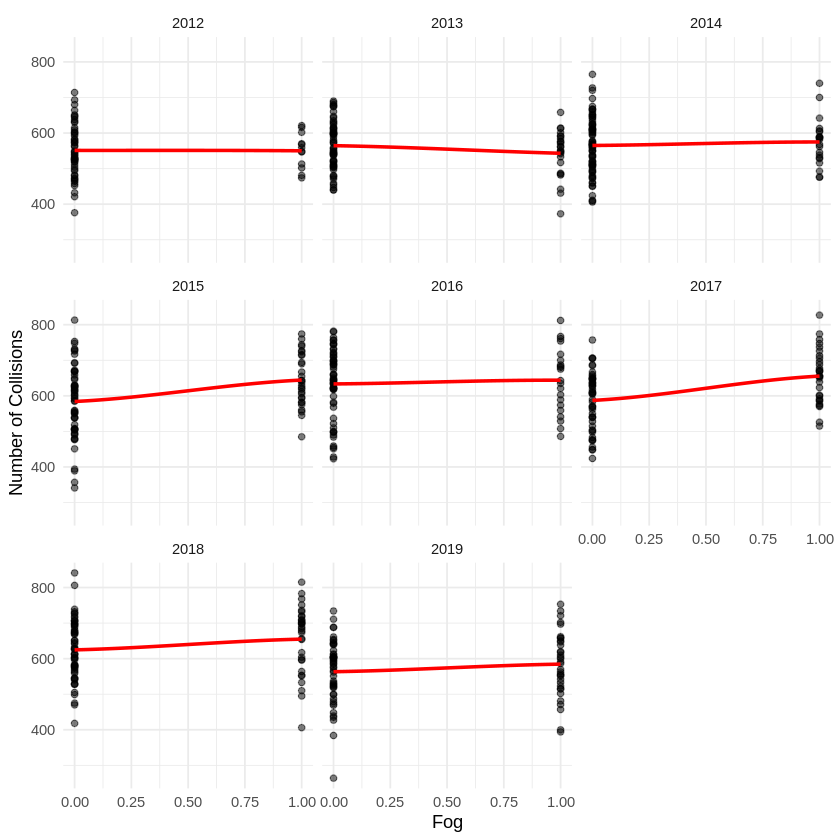

In [ ]:
corr_and_plot("fog", "Fog")

The variables showing the strongest correlations are day, temperature, dew point, and visibility, and therefore they will be used as the basis for constructing a linear regression model.

In [ ]:
model_data <- collisions_filtered[, c("day", "temp", "dewp", "visib", "NUM_COLLISIONS")]

In [ ]:
head(model_data)

,day,temp,dewp,visib,NUM_COLLISIONS
,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,2,59.8,50.2,10.0,475
3,6,38.6,34.4,9.6,806
4,4,43.5,30.4,10.0,510
6,5,77.1,62.0,10.0,565
7,6,78.2,69.6,9.3,581
8,6,77.4,60.2,10.0,577


In the case of the deep neural network model, all variables will be utilised, as there could be hidden or non-linear correlations among them that are not shown in the previous data analysis.

In [ ]:
model_data_dnn <- collisions_filtered

In [ ]:
head(model_data_dnn)

,day,year,mo,da,collision_date,temp,dewp,slp,visib,wdsp,mxpsd,gust,max,min,prcp,fog,NUM_COLLISIONS,z_score
,<dbl>,<int>,<int>,<int>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,"<dbl[,1]>"
1,2,2018,9,23,2018-09-23,59.8,50.2,1023.4,10.0,3.0,5.1,NA,78.1,53.1,0,0,475,-0.1123944
3,6,2018,12,20,2018-12-20,38.6,34.4,1020.2,9.6,5.0,7.0,NA,48.0,21.0,0,0,806,1.9423146
4,4,2013,11,5,2013-11-05,43.5,30.4,1037.8,10.0,3.9,7.0,NA,50.0,37.9,0,0,510,0.1048709
6,5,2012,7,11,2012-07-11,77.1,62.0,1019.9,10.0,1.9,7.0,NA,84.0,64.9,0,0,565,0.4462878
7,6,2012,8,9,2012-08-09,78.2,69.6,1013.6,9.3,2.3,7.0,15,88.0,61.0,0,0,581,0.5456090
8,6,2012,7,12,2012-07-12,77.4,60.2,1021.7,10.0,2.3,7.0,NA,88.0,57.0,0,0,577,0.5207787


Now we just need to export the data.

In [ ]:
write.csv(model_data, "model_data.csv", row.names = FALSE)


In [ ]:
write.csv(model_data_dnn, "model_data_dnn.csv", row.names = FALSE)

#### Conclusion and Next Steps
In this research we've analysed various factors and their relationships in order to find some signficant correlations. When considering data aggregated over multiple years, the correlations appeared weak, showing also a separation between the data before and after the COVID-19 pandemic. This separation indicates the distinct behavioural and pattern shifts induced by the pandemic. However, when analysing the data year by year it became evdent that the correlations strengthened, suggesting that certain variables' influence on the number of collissions may vary on an annual basis.

Specifically, the variables identified with strong correlations are day of the week, temperature, dew point, and visibility. On the other hand, the correlations for other variables were not as strong, suggesting perhaps a more complex influence.

Given these findings, the variables with the strongest correlations will be used for the linear regressions model as this model aims to show the direct relationships. For the deep neural network model, instead, all variables will be incorporated. In fact, deep learning can uncover hidden or non-linear correlations among variables that might not have been captured by the data analysis or the linear regression model.
